In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib notebook
plt.rcParams.update({'font.size': 14})

'''Measurement with Battery'''
# Board with Diode -> Input voltage = 4.22 to 4.26 V -> Output HV (100MOhm + Probe) = 3300 to 3380 V
# Board without Diode -> Input voltage = 5.06V -> Output HV (100MOhm + Probe) = 4380 to 4500 V

'''Measurement with power supply'''
# Input Voltage
x = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.1]) # Input voltage

# Output HV (Probe only)
y1 = np.array([[1380, 1460], [2380, 2460], [3180, 3260], [3900, 3980], [4620, 4740], [5460, 5580], 
      [6100, 6260], [6980, 7140], [7740, 7900], [7880, 8120]])

# Output HV (100MOhm + Probe)
y2 = np.array([[660, 740], [1260, 1340], [1700, 1780], [2100, 2180], [2700, 2780], [3060, 3140], 
      [3500, 3580], [3940, 4020], [4340, 4420], [4420, 4500]])

In [2]:
xx = np.array([x,x]).T.reshape(-1, 1)
y1F = y1.reshape(-1, 1)
y2F = y2.reshape(-1, 1)

reg1 = LinearRegression().fit(xx, y1F)
print(reg1.score(xx, y1F))
y1P = reg1.predict(x.reshape(-1, 1))


reg11 = LinearRegression().fit(xx[:6], y1F[:6])
print(reg11.score(xx, y1F))
y11P = reg11.predict(x.reshape(-1, 1))

reg2 = LinearRegression().fit(xx, y2F)
print(reg2.score(xx, y2F))
y2P = reg2.predict(x.reshape(-1, 1))

ratio = y1F/y2F
print(np.mean(ratio[:6]), np.std(ratio[:6]))

0.9980512381412479
0.9412076029068898
0.996629021927846
1.9151067929574603 0.09147599862554981


In [3]:
board = np.array([4.24, 5.06]).reshape(-1, 1)

y11B = reg11.predict(board)
y1B = reg1.predict(board)
y2B = reg2.predict(board)

print("Board with diode effect input = %.2f V, Predicted Voltage = %.1f, Direct measure = %.1f, Ideal = %.1f V" %
     (board[0], y11B[0], y1B[0],  y2B[0]*2))
print("Pure amp component: effect input = %.2f V, Predicted Voltage = %.1f, Direct measure = %.1f, Ideal = %.1f V" %
     (board[1], y11B[1], y1B[1], y2B[1]*2))

Board with diode effect input = 4.24 V, Predicted Voltage = 7285.3, Direct measure = 6641.7, Ideal = 7476.2 V
Pure amp component: effect input = 5.06 V, Predicted Voltage = 8761.3, Direct measure = 7928.0, Ideal = 8957.1 V


<IPython.core.display.Javascript object>


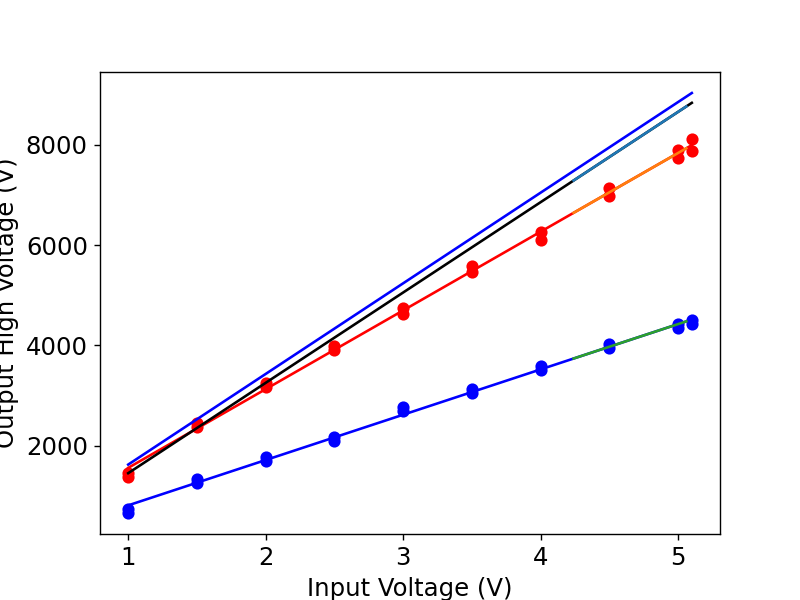

In [4]:
plt.plot(x, y1, 'ro');
plt.plot(x, y2, 'bo');
plt.plot(x, y1P,color='r')
plt.plot(x, y11P,color='k')
plt.plot(x, y2P,color='b')
plt.plot(x, y2P*2, 'b-')
plt.plot(board, y11B)
plt.plot(board, y1B)
plt.plot(board, y2B)
plt.xlabel('Input Voltage (V)');
plt.ylabel('Output High Voltage (V)');